future enhancement: random solvable maze generating function banaayera tya bata call garne instead of giving a maze as input

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from matplotlib import colors
from collections import deque
from IPython.display import HTML, display

In [180]:
# original_maze = [
#     ['S', 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
#     [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
#     [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
#     [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
#     [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
#     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
#     [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
#     [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0],
#     [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
#     [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
#     [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
#     [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
#     [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
#     [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
#     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
#     [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
#     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 'G'],
# ]

original_maze = [
    ['S', 0, 1, 0, 0, 1, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 'G'],
]


In [181]:
def to_numeric_grid(maze):
    mapping = {'S':2, 'G':3, '1':1, '0':0, 1:1, 0:0}
    numeric_grid = np.array([[mapping.get(element,100) for element in row] for row in maze],dtype=int)
    return numeric_grid

numerized_maze = to_numeric_grid(original_maze)

In [182]:
def generate_random_maze(rows, cols, wall_prob=0.3):
    maze = np.random.choice([0, 1], size=(rows, cols), p=[1 - wall_prob, wall_prob])
    maze[0][0] = 2
    maze[rows - 1][cols - 1] = 3 
    return np.array(maze)

numerized_maze_random = generate_random_maze(10, 10)


In [183]:
def find_pos(maze,value):
    for i in range(len(maze)): #iterating over rows in the maze
        for j in range(len(maze[i])): #iterating over elements in a row
            if maze[i][j]==value:
                return (i,j)
    return None

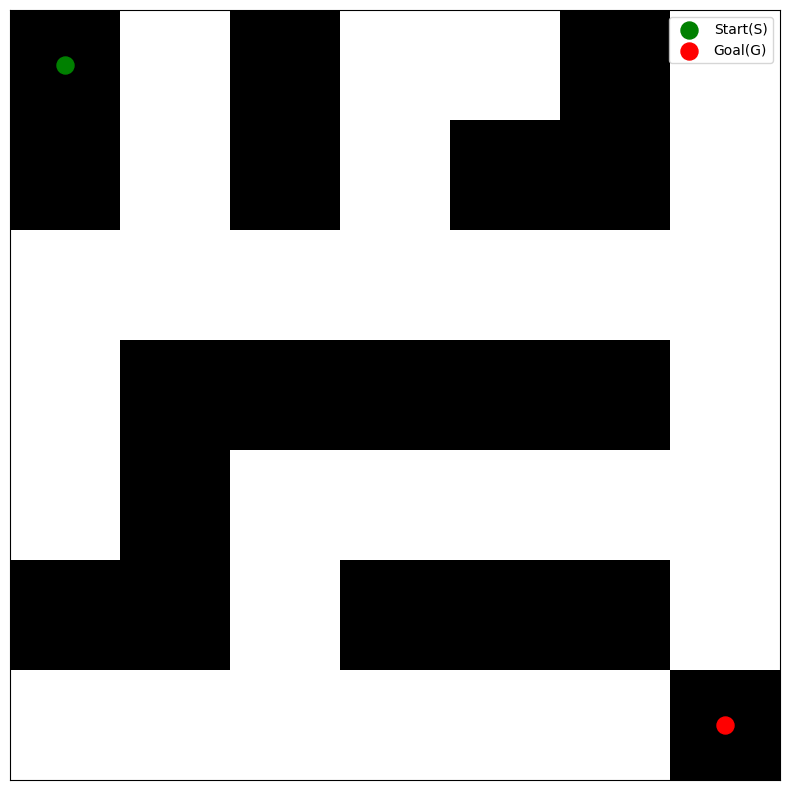

In [184]:
def visualize_maze(maze):
    start_pos=find_pos(maze,2)
    goal_pos=find_pos(maze,3)

    cmap = colors.ListedColormap(['white', 'black'])
    bounds = [-0.5, 0.5, 1.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    plt.figure(figsize=(10,10))
    plt.imshow(maze, cmap=cmap,norm=norm)

    plt.scatter(start_pos[0],start_pos[1],s=150,c='green',label='Start(S)')
    plt.scatter(goal_pos[0],goal_pos[1],s=150,c='red',label='Goal(G)')
    plt.legend()

    plt.xticks([])
    plt.yticks([])

    plt.show()

visualize_maze(numerized_maze)

In [185]:
def get_neighbors(maze, r,c):
    directions =[(-1,0),(1,0),(0,1),(0,-1)]
    rows, columns = len(maze), len(maze[0])

    for (dr, dc) in directions:
        nr = r+dr
        nc = c+dc
        if (0 <= nr < rows) and (0 <= nc < columns):
            if maze[nr][nc] != 1:
                yield (nr,nc)
        
neighbors = list(get_neighbors(numerized_maze, 1, 1))
print(neighbors)

[(0, 1), (2, 1)]


In [186]:
def solve_maze(maze, algorithm='bfs'):
    if algorithm not in ['bfs', 'dfs']:
        print('Invalid algorithm. Choose bfs or dfs')
        return

    start = find_pos(maze, 2)
    goal = find_pos(maze, 3)

    frontier = deque([(start, [start])]) if algorithm == 'bfs' else [(start, [start])]
    visited = set()

    cmap = colors.ListedColormap(['white', 'black', 'green', 'red', 'yellow', 'blue'])  # 0,1,2,3,4,5

    fig, ax = plt.subplots(figsize=(10, 10))
    img = ax.imshow(maze, cmap=cmap)
    ax.set_title(f"{algorithm.upper()} Maze Solver")

    found_goal = False

    def update(frame):
        nonlocal frontier, found_goal
        start_time = time.time()

        if found_goal or not frontier:
            return img

        (r, c), path = frontier.popleft() if algorithm == 'bfs' else frontier.pop()

        if (r, c) in visited:
            return img

        visited.add((r, c))

        if (r, c) == goal:
            path_length = len(path)
            end_time = time.time()
            execution_time = end_time - start_time
            print("Goal reached at", (r, c))
            print(f'Path length: {path_length}')
            print(f'Steps taken: {len(visited)}')
            print(f'Total visited nodes: {len(visited)}')
            print(f'Execution time: {execution_time:.3f} seconds')

            for pr, pc in path:
                if maze[pr][pc] not in [2, 3]:
                    maze[pr][pc] = 5  # color solved path blue (5)
            img.set_data(maze)
            found_goal = True 
            return img

        if maze[r][c] not in [2, 3]:
            maze[r][c] = 4  # color visited path yellow

        for nr, nc in get_neighbors(maze, r, c):
            if (nr, nc) not in visited and maze[nr][nc] != 1:
                frontier.append(((nr, nc), path + [(nr, nc)]))

        print(f"Visiting: {(r, c)}, Frontier size: {len(frontier)}")

        img.set_data(maze)
        return img

    def close_on_key(event):
        plt.close(fig)

    fig.canvas.mpl_connect('key_press_event', close_on_key)
    # # global anim
    anim = animation.FuncAnimation(fig, update, interval=300, frames=500, repeat=False)

    HTML(anim.to_jshtml()) 
    # # plt.show()


Visiting: (0, 0), Frontier size: 1
Visiting: (0, 1), Frontier size: 1
Visiting: (1, 1), Frontier size: 1
Visiting: (2, 1), Frontier size: 2
Visiting: (2, 2), Frontier size: 2
Visiting: (2, 0), Frontier size: 2
Visiting: (2, 3), Frontier size: 3
Visiting: (3, 0), Frontier size: 3
Visiting: (1, 3), Frontier size: 3
Visiting: (2, 4), Frontier size: 3
Visiting: (4, 0), Frontier size: 2
Visiting: (0, 3), Frontier size: 2
Visiting: (2, 5), Frontier size: 2
Visiting: (0, 4), Frontier size: 1
Visiting: (2, 6), Frontier size: 2
Visiting: (1, 6), Frontier size: 2
Visiting: (3, 6), Frontier size: 2
Visiting: (0, 6), Frontier size: 1
Visiting: (4, 6), Frontier size: 2
Visiting: (5, 6), Frontier size: 2
Visiting: (4, 5), Frontier size: 2
Goal reached at (6, 6)
Path length: 13
Steps taken: 22
Total visited nodes: 22
Execution time: 0.000 seconds


KeyboardInterrupt: 

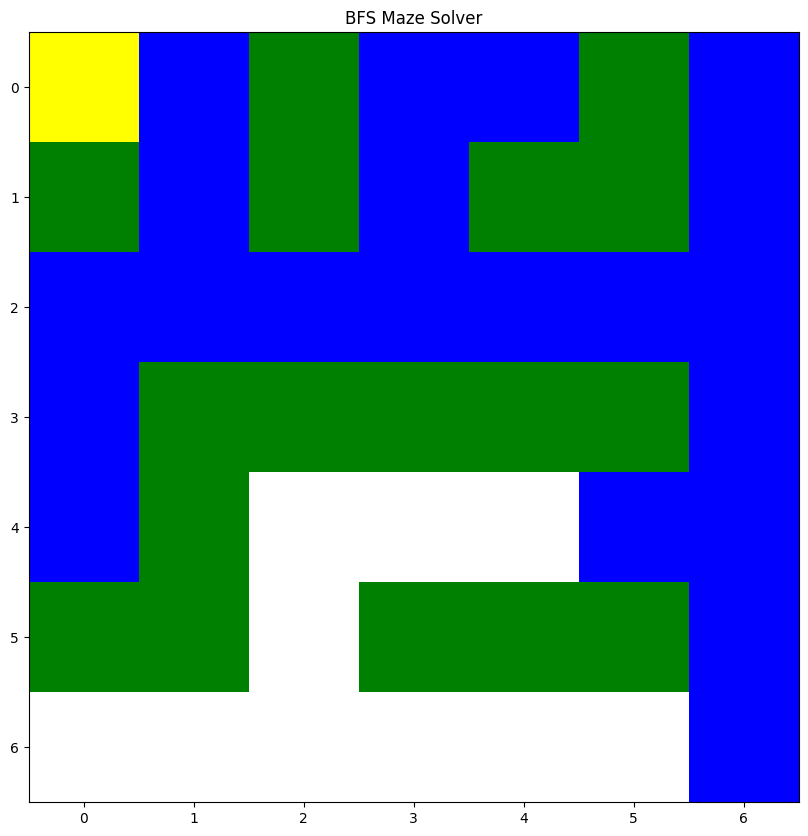

In [187]:
# algorithm = input("Enter algorithm (BFS or DFS): ").strip().lower()


ani = solve_maze(numerized_maze)
display(ani)